script to compare the coupled "home reanalysis" (dcppA-assim) with the forced reanalysis which is used to nudged the coupled simulation (JRA55doV1.5_Acycl: NEMO PISCES forced by the JRA55 reanalysis). 

### Input parameters and libraries

In [1]:
#import matplotlib
#matplotlib.use('Agg') # to run on aneto (not very useful for this script)
from function_read import * # some auxiliary functions that I wrote to read the file
#other libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import scipy.stats
import cartopy as cart
import cartopy.crs as ccrs
from function_read import *
from mpl_toolkits.axisartist.axislines import Subplot 
import sys

# name of the experience
exp="dcppA-hincast"

#period to analyse
year1=1998
year2=2014
#number of months of the hindcast to read
nmon=6
#number of members
nmemb=10
#starting month of the hindcast (may:5 or November:11)
monstart=5

regname="Nino34"
lat_bnds = [-5,5]
lon_bnds = [360-170,360-120]
#lon_bnds = [-180,-120]

#regname="Atl3"
#lat_bnds = [-3,3]
#lon_bnds = [-20,-1]


varnamelst=["chlos", "intpp", "tos"]
level="all"
lat_bnds = [-80,80]
lon_bnds = [-179,179]

In [2]:
#compute dates from year1 and year2
nyear=year2-year1+1
yearlst=np.arange(year1, year2+1)
sdatelst=[]
for year in yearlst:
    sdatelst.append(date(year=year, month=monstart, day=1))

### Read files: Forced and NUDGED simulation

In [3]:
# list to be converted in array to store the data
climforlst=[]
climndglst=[]
lonlst=[]
latlst=[]
#loop over variables
for varname in varnamelst:
    f="/cnrm/pastel/USERS/prodhommec/NO_SAVE/JRA55doV1.5_Acycl/"+varname+"_Omon_CNRM-ESM2-1_gcpA_r1i1p1f1_gn_184801-201912.nc"
    if level!="all":
        f=cdo.remapbil("r360x180", input=("-sellevel,%i "%level)+f)
    else:
        f=cdo.remapbil("r360x180", input=f)
    print(f)
    varffor=netCDF4.Dataset(f)
    #extract array from fonction read (the fonction would need adaptation to work directly on the NEMO grid)
    indexfor, latfor, lonfor  = extract_array(varffor, varname, (year2-1848+2)*12, lon_bnds, lat_bnds, level=level)
    #remove the first years of the period to keep only the periode from year1 to year2
    indexfor = indexfor[((year1-1848)*12):,:,:]
    climfor = np.mean(indexfor, axis=(0))
    #probleme interpolation
    #in some cases the cdo interpolation it creates missing data for le the longitude i=251
    #to avoir this we duplicate the longitude i=251
    #could be improved
    climfor[:,252]=climfor[:,251]
    climforlst.append(climfor)


    f="/cnrm/pastel/USERS/prodhommec/NO_SAVE/dcppA-assim_r4i1p1f2/"+varname+"_Omon_CNRM-ESM2-1_dcppA-assim_r4i1p1f2_gn_196001-201412.nc"
    if level!="all":
        f=cdo.remapbil("r360x180", input=("-sellevel,%i "%level)+f)
    else:
        f=cdo.remapbil("r360x180", input=f)
    print(f)

    varfndg=netCDF4.Dataset(f)
    #extract array from fonction read (the fonction would need adaptation to work directly on the NEMO grid)
    indexndg, latndg, lonndg  = extract_array(varfndg, varname, (year2-1960+2)*12, lon_bnds, lat_bnds, level="all")
    #remove the first years of the period to keep only the periode from year1 to year2
    indexndg = indexndg[((year1-1960)*12):,:,:]
    climndg = np.mean(indexndg, axis=(0))
    climndglst.append(climndg)
    lonlst.append(lonndg)
    latlst.append(latndg)


/home/prodhommec/tmp/cdoPytid8xg1_
all
True [-179  179]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(2016, 160, 359)
/home/prodhommec/tmp/cdoPyg_8yx786
all
True [-179  179]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(660, 160, 359)
/home/prodhommec/tmp/cdoPywf9afw_c
all
True [-179  179]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(2016, 160, 359)
/home/prodhommec/tmp/cdoPy9xs6gg8w
all
True [-179  179]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(660, 160, 359)
/home/prodhommec/tmp/cdoPygs6d7u9u
all
True [-179  179]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(2016, 160, 359)
/home/prodhommec/tmp/cdoPy4lq6u36j
all
True [-179  179]
3


/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:27: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(lon_bnds != "all", lon_bnds)
/home/prodhommec/analyseMF/scripts-final-MF/previ-sais/function_read.py:28: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if lon_bnds != "all":


(660, 160, 359)


In [7]:
from mpl_toolkits.axisartist.axislines import Subplot 
import matplotlib.colors as colors
from matplotlib import ticker, cm
import cartopy
import cartopy.crs as ccrs

#def PlotField(ax, field, lons, lats, colorbar, title, levs, norm, signi=False, signifield=None):
def PlotField(ax, field, lons, lats, colorbar, cmin, cmax, title, cbar=True):    
    lons[lons>180]=lons[lons>180]-360                                                                                                                                                                           
    #ax = plt.axes(projection=cart.crs.Robinson())                                                                                                                                                               
    #ax.coastlines()                                                                                                                                                                                             
    ax.set_title(title)                                                                                                                                                                                       

        
    cmap = cm.get_cmap(colorbar, 10)

    inter=(cmax-cmin)/20.
    bounds = np.arange(cmin, cmax+inter, 
                  inter)
    
    norm = colors.BoundaryNorm(bounds, cmap.N, clip=False)
    
    mesh = ax.pcolormesh(lons, lats, np.ma.array(field, mask=field>1e19), cmap=cmap,
                     transform=ccrs.PlateCarree(),
                         norm=norm)
    ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k')

    #ax.set_extent((lon_bnds[0],lon_bnds[1],lat_bnds[0],lat_bnds[1]),crs=ccrs.PlateCarree(central_longitude=71),)                                                                                                
    # cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())                                                                                                                                                     
    #plot = ax.contourf(lons, lats, field, levs, transform=cartopy.crs.PlateCarree(), cmap=colorbar, norm=norm)                                                                                                  
    #ax.add_feature(cartopy.feature.LAND,zorder=100, edgecolor='k')                                                                                                                                              
    return(mesh)



<Figure size 432x288 with 0 Axes>

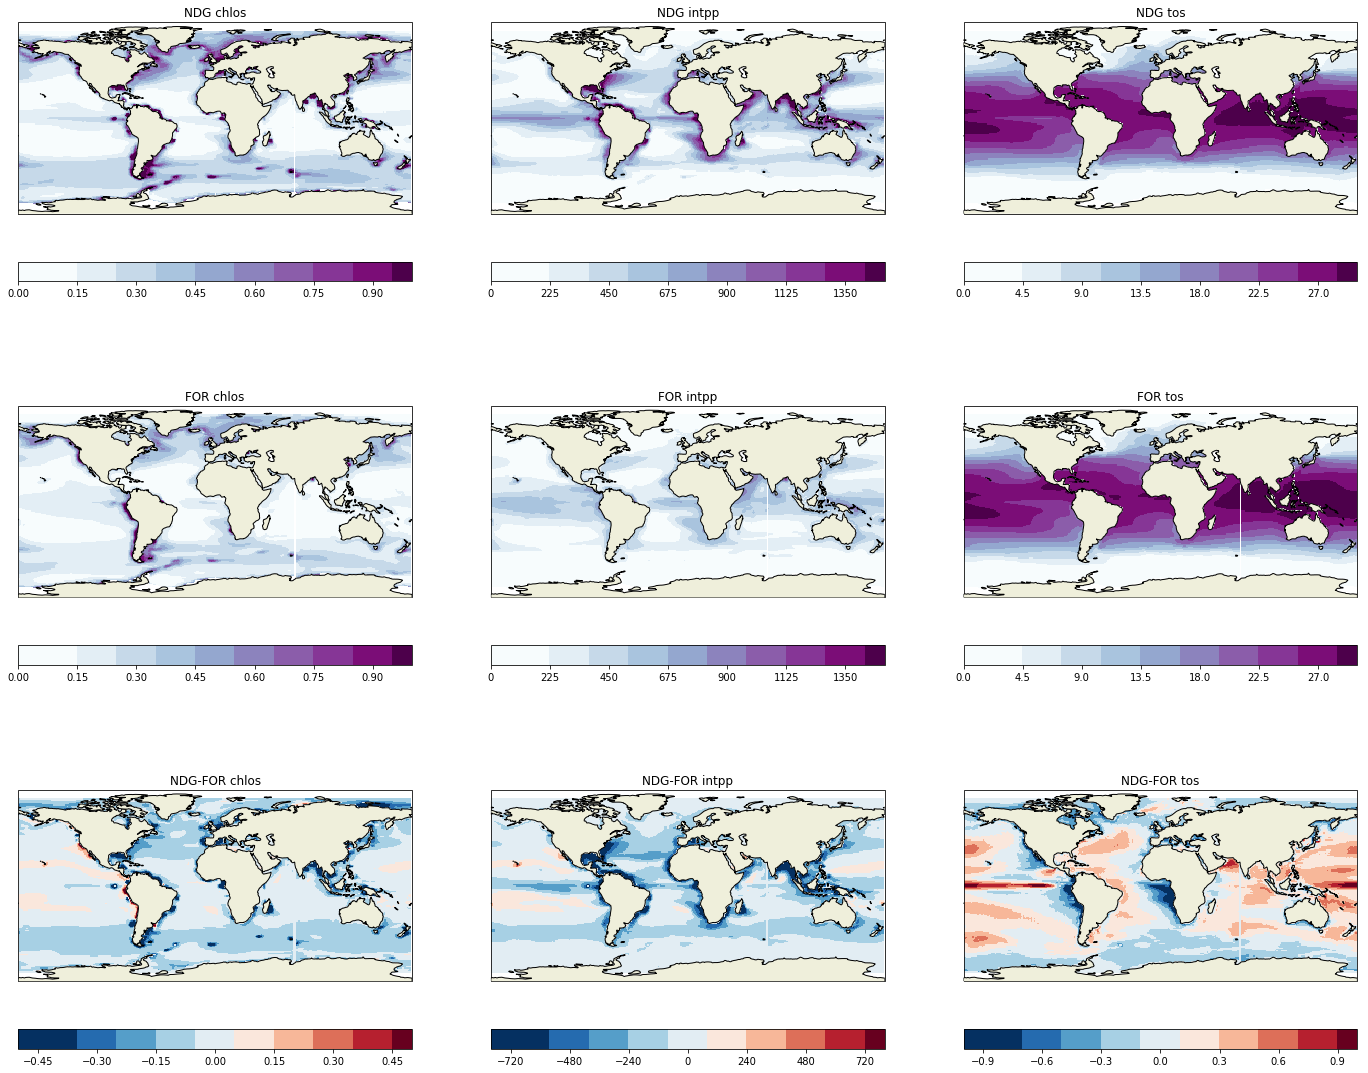

In [8]:
#plt.ion()
nvar=len(varnamelst)
nline=3
ncol=max(nvar, 2)

maxdict = {"tos":30,"bigthetao":20, "chlos":1, "o2":400, "no3os":30, "intpp":1500}
mindict = {"tos":0, "chlos":0,"bigthetao":5, "o2":200,"no3os":0, "intpp":0}
maxdictbias = {"tos":1, "chlos":0.5,"bigthetao":5, "o2":30,"no3os":10, "intpp":800}
scaledict = {"tos":1, "bigthetao":1,"chlos":1e3, "o2":1e3, "no3os":1e3, "intpp":12*1000*3600*24 }
fig = plt.figure()
fig.tight_layout()    

fig, axs = plt.subplots(ncols=ncol, nrows=nline, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8*nvar, 20))


for ivar in range(nvar):
    
    mesh = PlotField(axs[0,ivar], climndglst[ivar]*scaledict.get(varnamelst[ivar]), 
                              lonlst[ivar], latlst[ivar], 'BuPu', mindict.get(varnamelst[ivar]), 
                     maxdict.get(varnamelst[ivar]), 
                             "NDG" + " "+varnamelst[ivar]) 
    fig.colorbar(mesh, orientation="horizontal", ax=axs[0,ivar], shrink=1, spacing="proportional")

     


    mesh = PlotField(axs[1,ivar], climforlst[ivar]*scaledict.get(varnamelst[ivar]), 
                              lonlst[ivar], latlst[ivar],'BuPu',  mindict.get(varnamelst[ivar]), 
                               maxdict.get(varnamelst[ivar]), 
                             "FOR "+varnamelst[ivar])
    fig.colorbar(mesh, orientation="horizontal", ax=axs[1,ivar], shrink=1, spacing="proportional")
    

    
    mesh = PlotField(axs[2,ivar], 
                              (climforlst[ivar]-climndglst[ivar])*scaledict.get(varnamelst[ivar]), #,, 
                              lonlst[ivar], latlst[ivar],
                              'RdBu_r', 
                     -maxdictbias.get(varnamelst[ivar]), maxdictbias.get(varnamelst[ivar]), 
                              "NDG"+"-FOR "+varnamelst[ivar])
        
    fig.colorbar(mesh, orientation="horizontal", ax=axs[2,ivar], shrink=1, spacing="proportional")


In [9]:
figdir="/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/"
figname=figdir+("DiffFORNDG"+"_chlos_tos_intpp")
figname=(figname+".pdf")

print(figname)
fig.savefig(figname)

/home/prodhommec/cnrm/pastel/USERS/prodhommec/NO_SAVE/plot/Skill/DiffFORNDG_chlos_tos_intpp.pdf
